# Evaluation Metrics

We will be focusing on metrics that are used in supervised learning

**For classification problems**
1. Accuracy
2. Precision (P)
3. Recall (R)
4. F1 score (F1)
5. Area under the ROC (Receiver Operating Characteristic) or simply AUC
6. Log Loss
7. Precision at k (P@k)
8. Average precision at k (AP@k)
9. Mean average precision at k (MAP@k)

**For regression problems:**
1. Mean absolute error (MAE)
2. Mean squared error (MSE)
3. Root mean squared error (RMSE)
4. Root mean squared logarithmic error (RMSLE)
5. Mean percentage error (MPE)
6. Mean absolute percentage error (MAPE)
7. R2

## Classification Metrics

### Accuracy

When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and f1.

In [1]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    
    # initialize a simple counter for correct predictions
    correct_counter = 0

    # loop over all elements of y_true and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1

    # return accuracy which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [2]:
# using scikit-learn library
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [3]:
accuracy(l1, l2)

0.625

You should not use accuracy metrics when your data is skewed as it is not representative of the data. So, you might get high accuracy, but your model will probably not perform that well when it comes to real-world samples

### Some important Terms

* **True Positive (TP):** Model correctly predicts the positive class.
* **True Negative (TN):** Model correctly predicts the negative class.
* **False Positive (FP):** Model incorrectly predicts positive when it is actually negative.
* **False Negative (FN):** Model incorrectly predicts negative when it is actually positive.


In [4]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """

    # initialise
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

In [5]:
def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    return: number of true negatives
    """

    # initialise
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

In [6]:
def false_positive(y_true, y_pred):
    """ 
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    return: number of false positives
    """

    # initialise
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp 

In [7]:
def false_negative(y_true, y_pred):
    """ 
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    return: number of false negatives 
    """

    # initialise
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn 

**Note:** Above functions only works for binary classification 

In [8]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

true_positive(l1, l2)

2

In [9]:
true_negative(l1, l2)

3

In [10]:
false_positive(l1, l2)

1

In [11]:
false_negative(l1, l2)

2

Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

In [12]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """

    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)

    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [13]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

accuracy(l1, l2)

0.625

In [14]:
accuracy_v2(l1, l2)

0.625

In [15]:
metrics.accuracy_score(l1, l2)

0.625

### Precision

Precision = TP / (TP + FP)

In [16]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """

    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [17]:
# means our model is correct 66.6% times when it’s trying to identify positive samples 
precision(l1, l2)

0.6666666666666666

### Precision vs Recall

* **Precision** → Of all predicted positives, how many are actually positive.

  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

* **Recall** → Of all actual positives, how many did the model correctly identify.

  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$




In [18]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [19]:
recall(l1, l2)

0.5

For a “good” model, our precision and recall values should be high. 

#### Precision-recall Curve

If for every threshold we choose, we calculate the precision and recall values, we can create a plot between these sets of values. This plot or curve is known as the precision-recall curve. 

In [20]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [
            0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 
            0.17554844, 0.15952202, 0.03819563, 0.11639273, 0.079377,
            0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, 
            0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815
        ]

precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377,
    0.08584789, 0.11114267, 0.11639273,
    0.15952202, 0.17554844, 0.18521942,
    0.27259048, 0.31620708, 0.33056815,
    0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary and append 
# calculated precisions and recalls to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

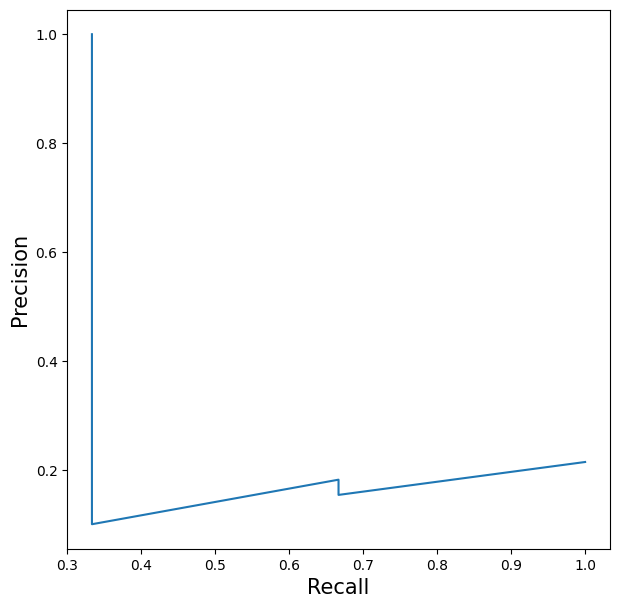

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

* It’s challenging to choose a value of threshold that gives both good precision and recall values.
* Both precision and recall range from 0 to 1 and a value closer to 1 is better

### F1 score

* The **F1 score** is a metric that combines both **precision** and **recall** into a single value.
* It is defined as the **harmonic mean** of precision and recall.

Formula (in terms of Precision and Recall)

$$
F1 = \frac{2 \cdot P \cdot R}{P + R}
$$

where

* $P$ = Precision
* $R$ = Recall

Formula (in terms of TP, FP, FN)

$$
F1 = \frac{2 \cdot TP}{2TP + FP + FN}
$$

where

* $TP$ = True Positives
* $FP$ = False Positives
* $FN$ = False Negatives


In [22]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [23]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [24]:
f1(y_true, y_pred)

0.5714285714285715

In [25]:
from sklearn import metrics

metrics.f1_score(y_true, y_pred)

0.5714285714285714

Instead of looking at precision and recall individually, you can also just look at F1
score. 

F1 score also ranges from 0 to 1, and a perfect prediction model has an F1 of 1.

### True Positive Rate / Sensitivity / Recall 

TPR = TP / (TP + FN)

In [26]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

### False Positive Rate 

FPR = FP / (TN + FP)

In [27]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

1 - FPR is known as **specificity** or **True Negative Rate** or TNR.

### Receiver Operating Characteristic (ROC)

In [28]:
# empty lists to store tpr and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
    0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
    0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
            0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)


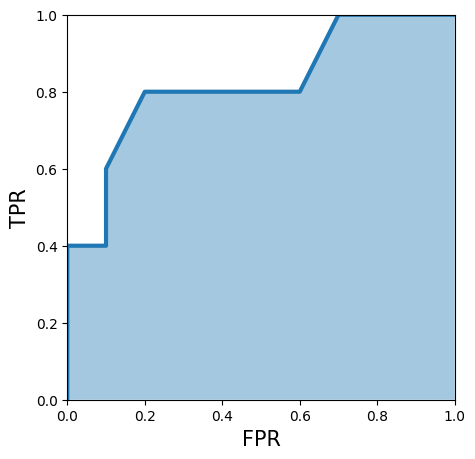

In [29]:
plt.figure(figsize=(5, 5))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the Receiver Operating Characteristic (ROC). 

### Area Under ROC Curve or Area Under Curve or AUC

In [30]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

* **AUC ranges from 0 to 1**.
* **AUC = 1** → Perfect model (often indicates a mistake in validation; if not, it’s the best possible model).
* **AUC = 0** → Model is completely wrong (or perfectly inverted). Try flipping predictions ($p \to 1-p$).
* **AUC = 0.5** → Predictions are random (no better than guessing).
* **AUC < 0.5** → Model is worse than random (often due to inverted class predictions).
* **AUC closer to 1** → Indicates a good model.


Prediction = Probability >= Threshold

Here, prediction is a new list which contains only binary variables. An item in prediction is 1 if the probability is greater than or equal to a given threshold else the value is 0.

You can use ROC curve to find this threshold

Most of the time, the top-left value on ROC curve should give you a quite good threshold

AUC is a widely used metric for skewed binary classification tasks in the industry

### Log Loss

* **Definition**: Log Loss (or cross-entropy loss) measures how well a classification model predicts probabilities.

* **Formula (binary)**:

  $$
  \text{Log Loss} = - \Big[ y \cdot \log(p) + (1-y) \cdot \log(1-p) \Big]
  $$

  * $y$ = true label (0 or 1)
  * $p$ = predicted probability for class 1

* **Interpretation**:

  * If $y = 1$: loss = $-\log(p)$ → penalty grows if $p$ is small.
  * If $y = 0$: loss = $-\log(1-p)$ → penalty grows if $p$ is large.

* **Multiple samples**: Average log loss across all data points.

* **Key property**:

  * Correct and confident predictions → **low loss**.
  * Wrong but confident predictions → **very high loss**.
  * Wrong but uncertain predictions (e.g., \~0.5 probability) → smaller penalty than being confidently wrong.

* **Why it’s useful**: Encourages models to output well-calibrated probabilities, not just correct classes.


In [31]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """

    # define an epsilon value which will be used to clip probabilities 
    epsilon = 1e-15

    # initialise empty list to store individual losses
    loss = []

    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability so that we don't have log(0) which is not defined
        yp = np.clip(yp, epsilon, 1 - epsilon)

        # calculate loss for one sample
        temp_loss = -1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))

        # add to loss list
        loss.append(temp_loss)

    # return mean loss over all samples
    return np.mean(loss)

In [32]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

In [33]:
log_loss(y_true, y_proba)

np.float64(0.49882711861432294)

In [34]:
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294

- If you predict with low confidence (close to 0.5), log loss will be high, even when you classify correctly.

- If you predict with high confidence (close to 1 or 0) and are correct, log loss will be small.

- If you predict with high confidence but are wrong, log loss will be huge (much worse than accuracy).

So log loss rewards confident, correct predictions and punishes uncertainty or overconfidence.

### **Multi-class classification**


When we move from **binary classification** → **multi-class classification**, metrics like **precision and recall** can be extended in different ways.

### Precision in Multi-class Classification

Recall that:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

For **multi-class problems**, we compute precision separately for each class, then combine them in different ways:

### 1. Macro-averaged Precision

* Compute precision **individually for each class**.
* Take the **unweighted average** across classes.
* Treats all classes **equally**, regardless of how many samples are in each class.
* Good when you want to evaluate performance **equally across all classes**, even minority ones.

### 2. Micro-averaged Precision

* Instead of calculating precision per class, you **sum up TP and FP across all classes first**, then calculate precision.
* Formula:

  $$
  \text{Micro Precision} = \frac{\sum TP}{\sum (TP + FP)}
  $$
* Gives more weight to **majority classes** because it aggregates before calculating.
* Good when overall performance matters more than per-class fairness.

### 3. Weighted Precision

* Same as **macro**, but each class’s precision is **weighted by its support** (number of samples in that class).
* Formula:

  $$
  \text{Weighted Precision} = \frac{\sum (\text{class size} \times \text{precision of that class})}{\text{total samples}}
  $$
* Helps when you have **class imbalance** but still want class-wise insight.


In [35]:
import numpy as np

def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """

    # find number of classes
    num_classes = len(np.unique(y_true))

    # initialise precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)

        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)

        # calculate precision for current class
        temp_precision = tp / (tp + fp)

        # keep adding precision for all classes
        precision += temp_precision

    # calculate and return average precision over all classes
    precision /= num_classes 

    return precision

In [36]:
import numpy as np

def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialise tp and fp to 0
    tp = 0
    fp = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)

        # calculate false positive for current class and update overall fp
        fp += false_positive(temp_true, temp_pred)

    # calculate and return overall precision
    precision = tp / (tp + fp)

    return precision


In [37]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # create class: sample dictionary 
    class_counts = Counter(y_true)

    # initialise precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate tp and fp for the current class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)

        # calculate precision of class
        temp_precision = tp / (tp + fp)

        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision

        # add to overall precision
        precision += weighted_precision

    # calculate overall precision by dividing with total number of samples
    overall_precision = precision / len(y_true)

    return overall_precision


In [38]:
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [39]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [40]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [41]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [42]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [43]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [44]:
metrics.precision_score(y_true,  y_pred, average="weighted")

0.39814814814814814

Similarly we can implement recall and f1 for multi-class models

### Confusion Matrix

A confusion matrix is nothing but a table of TP, FP, TN and FN. Using the confusion matrix, you can quickly see how many samples were misclassified and how many were classified correctly.

Sometimes, people also prefer calling FP as Type-I error and FN as Type-II error.

A perfect confusion matrix should only be filled diagonally from left to right. 

Text(0.5, 2.2499999999999947, 'Predicted Labels')

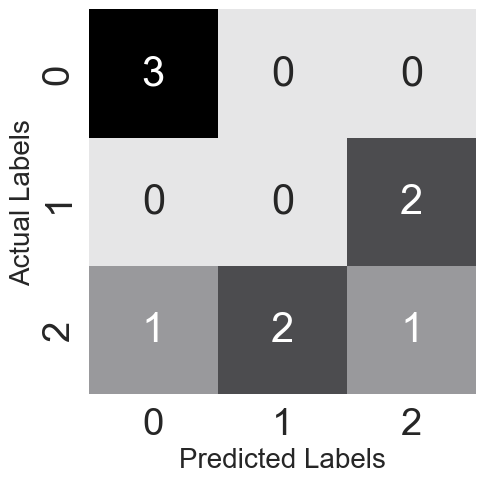

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets 
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

# some predictions
y_pred =  [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set_theme(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

### Multi-Label Classification

In multi-label classification, each sample can have one or more classes associated with it. 

### Precision @ k 

* **Precision\@K (P\@K):** Measures how many of the top-K predictions are correct.
* **Formula:**

  $$
  P@K = \frac{\text{Number of correct predictions in top-K}}{K}
  $$
* **Not the same as classification precision** (TP / (TP+FP)); here we only look at **top-K ranked predictions**.
* **Use case:** Ranking, search engines, recommendation systems.
* **Example:** If top-5 predictions contain 2 correct items → $P@5 = 2/5 = 0.4$.


In [46]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """

    # if k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]

    # convert predictions to set
    pred_set = set(y_pred)

    # convert actual values to set
    true_set = set(y_true)

    # find common values
    common_values = pred_set.intersection(true_set)
    
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

### Average precision @ k / AP@k

AP@k is calculated using P@k.

#### Example of AP\@k

True relevant items: `{A, B, C}`
Predicted ranking: `[A, D, B, E, C]`

Let’s compute **AP\@5**:

* At rank 1 → A is relevant → $Precision@1 = \frac{1}{1} = 1$
* At rank 2 → D not relevant → skip
* At rank 3 → B is relevant → $Precision@3 = \frac{2}{3} = 0.67$
* At rank 5 → C is relevant → $Precision@5 = \frac{3}{5} = 0.6$

Now average them:

$$
AP@5 = \frac{1 + 0.67 + 0.6}{3} \approx 0.756
$$


In [47]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    
    # initialize p@k list of values
    pk_values = []
    
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
    # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
        # if we have no values in the list, return 0
        if len(pk_values) == 0:
            return 0
        
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

### MAP\@k (Mean Average Precision at k)

**What it means:**
MAP\@k is the mean of AP\@k across all samples/queries.

**Formula:**

$$
MAP@k = \frac{1}{N} \sum_{i=1}^{N} AP@k(i)
$$

where:

* $AP@k(i)$ = Average Precision at k for sample $i$
* $N$ = total number of samples

**Example of MAP\@k**

Suppose we have 2 queries:

* Query 1 → $AP@5 = 0.756$ (from previous example)
* Query 2 → $AP@5 = 0.5$

Then:

$$
MAP@5 = \frac{0.756 + 0.5}{2} = 0.628
$$


In [48]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
    
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [49]:
y_true = [
            [1, 2, 3],
            [0, 2],
            [1],
            [2, 3],
            [1, 0],
            []
        ]

y_pred = [
            [0, 1, 2],
            [1],
            [0, 2, 3],
            [2, 3, 4, 0],
            [0, 1, 2],
            [0]
        ]

In [50]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [51]:
mapk(y_true, y_pred, k=2)

0.375

In [52]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [53]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

### **Multi-label Log Loss**


**Example (Movie Recommendation)**

| User | Ground Truth (Action, Comedy, Romance, Sci-Fi) | Predicted Probabilities | Log Loss per Genre            | Average Log Loss (per user) |
| ---- | ---------------------------------------------- | ----------------------- | ----------------------------- | --------------------------- |
| 1    | \[1, 0, 1, 0]                                  | \[0.8, 0.2, 0.6, 0.1]   | \[0.223, 0.223, 0.511, 0.105] | 0.266                       |
| 2    | \[0, 1, 0, 1]                                  | \[0.3, 0.7, 0.2, 0.9]   | \[0.357, 0.357, 0.223, 0.105] | 0.260                       |
| 3    | \[1, 1, 0, 0]                                  | \[0.9, 0.6, 0.4, 0.1]   | \[0.105, 0.511, 0.511, 0.105] | 0.308                       |

---

#### **Step 1:** Compute **log loss per genre** using:

$$
\text{Log Loss} = - [y \cdot \log(p) + (1-y) \cdot \log(1-p)]
$$

* $y = 1$ if user likes the genre, 0 otherwise
* $p =$ predicted probability

#### **Step 2:** Average across genres → **per-user log loss**

* Example for User 1:

$$
\frac{0.223 + 0.223 + 0.511 + 0.105}{4} \approx 0.266
$$

#### **Step 3:** Compute **mean across all users** → overall multi-label log loss (MAP-logloss)

$$
\text{MAP-logloss} = \frac{0.266 + 0.260 + 0.308}{3} \approx 0.278
$$

## Regression Metrics

1. **Error** = True Value - Predicted Value

2. **Absolute Error** = Abs(True Value - Predicted Value)

3. **Mean Absolute Error** = Absolute error / n   
    where n = no. of sample points

In [54]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """

    # initialise error at 0
    error = 0

    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error and add to error
        error += np.abs(yt - yp)

    # return mean error
    return error/len(y_true)

4. **Squared Error =**  
$$
(\text{True Value} - \text{Predicted Value})^2
$$

5. **Mean Squared Error (MSE) =** Squared Error / n   
where n is number of samples

In [55]:
def mean_squared_error(y_true, y_pred):
    """
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """

    # initialise error at 0
    error = 0

    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
        
    # return mean error
    return error / len(y_true)

6. **Root Mean Squared Error (RMSE) =** SQRT(MSE)

7. **Squared Logarithmic Error, Mean SLE, Root MSLE**

In [56]:
import numpy as np

def mean_squared_log_error(y_true, y_pred):
    """ 
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmi
    """

    # initialise error at 0
    error = 0
    
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error and add it to error
        error += (np.log(1+yt) - np.log(1 + yp)) ** 2

    # return mean error
    return error / len(y_true)

8.
$$
\text{Percentage Error} = \frac{\text{True Value} - \text{Predicted Value}}{\text{True Value}} \times 100
$$


In [57]:
def mean_percentage_error(y_true, y_pred):
    """
    This function calculates mpe
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    
    # initialize error at 0
    error = 0

    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
    
    # return mean percentage error
    return error / len(y_true)

9. MAPE - Mean Absolute Percentage Error

In [58]:
import numpy as np
def mean_abs_percentage_error(y_true, y_pred):
    """
    This function calculates MAPE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    # initialize error at 0
    error = 0

    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt

    # return mean percentage error
    return error / len(y_true)

10. **$R^2$ or Coefficient of Determination**

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:

* $y_i$ = actual values
* $\hat{y}_i$ = predicted values
* $\bar{y}$ = mean of actual values
* $n$ = number of samples

In [59]:
import numpy as np
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """

    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)

    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0

    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
        # calculate the ratio
        ratio = numerator / denominator
        
    # return 1 - ratio
    return 1 - ratio

There are more efficient ways to write all these metrics but we have used simplest low level implementation.  

For e.g. we can write mae as follows using np

In [60]:
import numpy as np
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### Advanced Metrics

1. **Quadratic Weighted Kappa (QWK)**, also called **Cohen’s kappa**, measures agreement between two ratings.
* Ratings and predictions can be any numbers from 0 to N.
* It’s suitable for classification problems with **N categories/classes**.
* High agreement → QWK score close to **1.0**; low agreement → score close to **0**.

In [61]:
from sklearn import metrics
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

In [62]:
metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

0.33333333333333337

In [63]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

You can see that even though accuracy is high, QWK is less. A QWK greater than 0.85 is considered to be very good!

2. **Matthew’s Correlation Coefficient (MCC)** is a metric ranging from **-1 to 1**.

  * 1 → perfect prediction
  * 0 → random prediction
  * -1 → completely wrong prediction
* Formula:

$$
MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$

* MCC considers **TP, FP, TN, FN**, making it suitable for **imbalanced class problems**.
* Easy to implement in Python using standard confusion matrix values.


In [ ]:
def mcc(y_true, y_pred):
    """
    This function calculates Matthew's Correlation Coefficient
    for binary classification.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)

    numerator = (tp * tn) - (fp * fn)

    denominator = (
    (tp + fp) *
    (fn + tn) *
    (fp + tn) *
    (tp + fn)
    )

    denominator = denominator ** 0.5

    return numerator/denominator 

* For evaluating **unsupervised methods** (e.g., clustering), it’s best to have a **separately labeled test set**.
* Keep the test set **independent** of the modeling process.
* After clustering, evaluate performance using **standard supervised learning metrics** on the test set.
